In [1]:
import os
import numpy as np
import pandas as pd
import numpy as np
np.random.seed(0)
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
import holoviews as hv
plt.rcParams['figure.figsize'] = (10,8)
hv.extension('bokeh')

from pyviz_med.visual import PyPatient
from pyviz_med.visual import PyCohort

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
import h5py

In [ ]:
import sys,os,os.path
os.environ['HDF5_USE_FILE_LOCKING']='FALSE'

import pydicom

In [2]:
div_mat = pd.read_csv("/pylon5/ac5616p/debdas/SCCORProcessing/tmp/COPDSCCORkl_div_3nn_mat.csv")
div_mat.rename(columns = {'Unnamed: 0':'Index'}, inplace = True)
div_mat.set_index('Index', inplace=True, drop=True)
div_mat.head()

26002U#Phase2  26002U#Phase1  25913E#Phase2  25913E#Phase1  \
Index                                                                       
26002U#Phase2       0.000000      51.740097      49.947716      32.704594   
26002U#Phase1      78.815100       0.000000      84.054280      64.726875   
25913E#Phase2      51.748867      51.155956       0.000000      24.334774   
25913E#Phase1      34.404830      43.571970      20.371664       0.000000   
25826J#Phase2      61.447754      32.743030      40.203480      48.953964   

               25826J#Phase2  25826J#Phase1  25145L#Phase2  25145L#Phase1  \
Index                                                                       
26002U#Phase2      64.417600      57.870586      31.353455      44.960730   
26002U#Phase1      54.753468      33.094720      54.179188      63.594100   
25913E#Phase2      34.021057      40.169804      48.068590      26.428179   
25913E#Phase1      46.697807      36.115330      29.065384      41.878610   
25826J#Phase2       0.000000      18.397000      53.775764      51.165370   

               24242E#Phase2  24242E#Phase1  ...  1-0808-8#Date_20110420#002  \
Index                                        ...                               
26002U#Phase2      32.608030      27.949540  ...                   63.613300   
26002U#Phase1      60.324930      53.222504  ...                  107.353120   
25913E#Phase2      22.375034      50.576244  ...                   44.430010   
25913E#Phase1      26.447897      23.888891  ...                   70.210850   
25826J#Phase2      42.899624      56.462400  ...                   61.162468   

               1-0807-4#Date_20110406#002  1-0805-8#Date_20110316#002  \
Index                                                                   
26002U#Phase2                   75.320930                   68.644264   
26002U#Phase1                  125.168710                  107.407080   
25913E#Phase2                   50.490753                   26.888441   
25913E#Phase1                   75.303740                   56.535637   
25826J#Phase2                   68.020350                   60.083076   

               1-0804-7#Date_20110309#002  1-0803-7#Date_20110309#002  \
Index                                                                   
26002U#Phase2                   76.884110                   58.943760   
26002U#Phase1                  121.648766                   96.909730   
25913E#Phase2                   47.401940                   22.183374   
25913E#Phase1                   73.763824                   48.867176   
25826J#Phase2                   65.761185                   55.140150   

               1-0800-8#Date_20110223#002  1-0794-4#Date_20101209#002  \
Index                                                                   
26002U#Phase2                   67.676650                   93.728360   
26002U#Phase1                  105.790726                  138.370930   
25913E#Phase2                   33.114178                   60.678220   
25913E#Phase1                   61.484776                   88.883020   
25826J#Phase2                   50.030900                   78.943245   

               1-0793-7#Date_20101124#002  1-0791-0#Date_20101117#002  \
Index                                                                   
26002U#Phase2                   44.090590                   51.270123   
26002U#Phase1                   63.511936                   83.507530   
25913E#Phase2                   25.399557                   27.733826   
25913E#Phase1                   44.237686                   49.602460   
25826J#Phase2                   46.896584                   51.463646   

               1-0787-6#Date_20101021#002  
Index                                      
26002U#Phase2                   53.499947  
26002U#Phase1                   82.826470  
25913E#Phase2                   20.174519  
25913E#Phase1                   42.178413  
25826J#Phase2                   39.544193  

[5 rows x 70 colu

In [3]:
div_mat.shape

(70, 70)

In [4]:

fig, ax = plt.subplots(figsize=(10,10))  
#sns.set()
sns.heatmap(div_mat, ax=ax ) #, xticklabels=True, yticklabels=True

### Divergence between COPD patients (with different appointments)

In [76]:
div_mat.loc[["26002U#Phase2", "26002U#Phase1", "25913E#Phase2", "25913E#Phase1"], \
            ["26002U#Phase2", "26002U#Phase1", "25913E#Phase2", "25913E#Phase1"]]

26002U#Phase2  26002U#Phase1  25913E#Phase2  25913E#Phase1
Index                                                                    
26002U#Phase2       0.000000      51.740097      49.947716      32.704594
26002U#Phase1      78.815100       0.000000      84.054280      64.726875
25913E#Phase2      51.748867      51.155956       0.000000      24.334774
25913E#Phase1      34.404830      43.571970      20.371664       0.000000

### Divergence between SCCOR Patients

In [77]:
div_mat.loc[["1-0841-3#Date_20120201#002", "1-0845-8#Date_20120208#002", "1-0847-3#Date_20120217#002"],\
            ["1-0841-3#Date_20120201#002", "1-0845-8#Date_20120208#002", "1-0847-3#Date_20120217#002"]]

1-0841-3#Date_20120201#002  \
Index                                                    
1-0841-3#Date_20120201#002                    0.000000   
1-0845-8#Date_20120208#002                   37.783783   
1-0847-3#Date_20120217#002                   37.901035   

                            1-0845-8#Date_20120208#002  \
Index                                                    
1-0841-3#Date_20120201#002                   73.261010   
1-0845-8#Date_20120208#002                    0.000000   
1-0847-3#Date_20120217#002                   39.692806   

                            1-0847-3#Date_20120217#002  
Index                                                   
1-0841-3#Date_20120201#002                   44.355534  
1-0845-8#Date_20120208#002                   24.979998  
1-0847-3#Date_20120217#002                    0.000000

### Divergence between COPD and SCCOR

In [78]:
div_mat.loc[["26002U#Phase2", "26002U#Phase1", "25913E#Phase2", "25913E#Phase1", "1-0841-3#Date_20120201#002", "1-0845-8#Date_20120208#002", "1-0847-3#Date_20120217#002"],\
            ["26002U#Phase2", "26002U#Phase1", "25913E#Phase2", "25913E#Phase1", "1-0841-3#Date_20120201#002", "1-0845-8#Date_20120208#002", "1-0847-3#Date_20120217#002"]]

26002U#Phase2  26002U#Phase1  25913E#Phase2  \
Index                                                                     
26002U#Phase2                    0.000000      51.740097      49.947716   
26002U#Phase1                   78.815100       0.000000      84.054280   
25913E#Phase2                   51.748867      51.155956       0.000000   
25913E#Phase1                   34.404830      43.571970      20.371664   
1-0841-3#Date_20120201#002     193.746140     190.725400     155.971850   
1-0845-8#Date_20120208#002     149.526980     131.894910      77.745560   
1-0847-3#Date_20120217#002     199.483000     191.804520     154.081150   

                            25913E#Phase1  1-0841-3#Date_20120201#002  \
Index                                                                   
26002U#Phase2                   32.704594                   75.725780   
26002U#Phase1                   64.726875                  127.883804   
25913E#Phase2                   24.334774                   52.715110   
25913E#Phase1                    0.000000                   77.756355   
1-0841-3#Date_20120201#002     191.553560                    0.000000   
1-0845-8#Date_20120208#002     140.247250                   37.783783   
1-0847-3#Date_20120217#002     200.788150                   37.901035   

                            1-0845-8#Date_20120208#002  \
Index                                                    
26002U#Phase2                                59.299988   
26002U#Phase1                                91.276920   
25913E#Phase2                                25.070543   
25913E#Phase1                                54.997192   
1-0841-3#Date_20120201#002                   73.261010   
1-0845-8#Date_20120208#002                    0.000000   
1-0847-3#Date_20120217#002                   39.692806   

                            1-0847-3#Date_20120217#002  
Index                                                   
26002U#Phase2                                63.019570  
26002U#Phase1                               100.639930  
25913E#Phase2                                49.702988  
25913E#Phase1                                73.090480  
1-0841-3#Date_20120201#002                   44.355534  
1-0845-8#Date_20120208#002                   24.979998  
1-0847-3#Date_20120217#002                    0.000000

### Row-Column tuple of divergence > 350

In [86]:
cnt = 0
large_divergence = []
for rows in list(div_mat.index.values):
    for cols in list(div_mat.columns.values):
        if div_mat[rows][cols] > 350:
            large_divergence.append((rows,cols,div_mat[rows][cols]))
            break
    cnt += 1
    if cnt > 9:
        break

In [87]:
large_divergence_df = pd.DataFrame(large_divergence, columns = ['Row', 'Column', 'DivergenceValue'])
large_divergence_df.head()

Row                      Column  DivergenceValue
0  26002U#Phase2  1-0819-7#Date_20110720#002        354.56757
1  26002U#Phase1  1-0810-4#Date_20110511#002        422.89700
2  25913E#Phase2  1-0810-4#Date_20110511#002        394.10510
3  25913E#Phase1  1-0819-7#Date_20110720#002        351.83050
4  25826J#Phase2  1-0810-4#Date_20110511#002        388.33777

## COPD vs SCCOR

In [5]:
import SimpleITK as sitk

In [2]:
featureSource = pd.read_csv('/pylon5/ac5616p/debdas/SCCORProcessing/COPD_SCCOR_FeatureSource.csv', header=None)

In [42]:
itkimage1 = sitk.ReadImage(featureSource.values[0][2])
getImgArray1 = sitk.GetArrayFromImage(itkimage1)
itkimage2 = sitk.ReadImage(featureSource.values[1][2])
getImgArray2 = sitk.GetArrayFromImage(itkimage2)
(unique, counts) = np.unique(np.concatenate((getImgArray1.flatten(), getImgArray2.flatten())), return_counts=True)
frequencies = np.asarray((unique[1:], counts[1:])).T
frequencies

array([[  98,  139],
       [ 119,  131],
       [ 152,   15],
       ...,
       [1621,  837],
       [1633,    7],
       [1651,   32]])

Text(0,0.5,'Count')

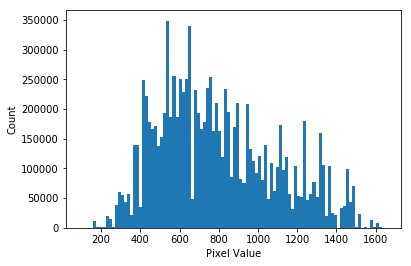

In [43]:
plt.hist(unique[1:], weights=counts[1:], bins=100)
plt.xlabel("Pixel Value")
plt.ylabel("Count")

In [ ]:
i = 0
copd_width = []
copd_height = []
copd_depth = []
sccor_width = []
sccor_height = []
sccor_depth = []

copd_x_pixel = []
copd_y_pixel = []
copd_z_pixel = []
sccor_x_pixel = []
sccor_y_pixel = []
sccor_z_pixel = []

copd_pixel_values = []
sccor_pixel_values = []

for patient in featureSource.values:
    file_reader = sitk.ImageFileReader()
    file_reader.SetFileName(patient[1])
    file_reader.ReadImageInformation()
    x, y, z = file_reader.GetSize()
    
    itkimage = sitk.ReadImage(patient[2])
    getImgArray = sitk.GetArrayFromImage(itkimage)
    pixel_pos = np.argwhere(getImgArray > 0)
    z_mean = np.mean(pixel_pos[:,0])/getImgArray.shape[0]
    y_mean = np.mean(pixel_pos[:,1])/getImgArray.shape[1]
    x_mean = np.mean(pixel_pos[:,2])/getImgArray.shape[2]
    
    getImgArrayFlat = getImgArray.flatten()
    ImgArray = getImgArrayFlat[getImgArrayFlat > 0]
    
   
    if i < 42:
        copd_width.append(x)
        copd_height.append(y)
        copd_depth.append(z)
        copd_x_pixel.append(x_mean)
        copd_y_pixel.append(y_mean)
        copd_z_pixel.append(z_mean)
        
        copd_pixel_values = np.concatenate((copd_pixel_values, ImgArray))
        
    else:
        sccor_width.append(x)
        sccor_height.append(y)
        sccor_depth.append(z)
        sccor_x_pixel.append(x_mean)
        sccor_y_pixel.append(y_mean)
        sccor_z_pixel.append(z_mean)
        
        sccor_pixel_values = np.concatenate((sccor_pixel_values, ImgArray))
        
    i += 1
    

Text(0.5,0.98,'COPD vs SCCOR')

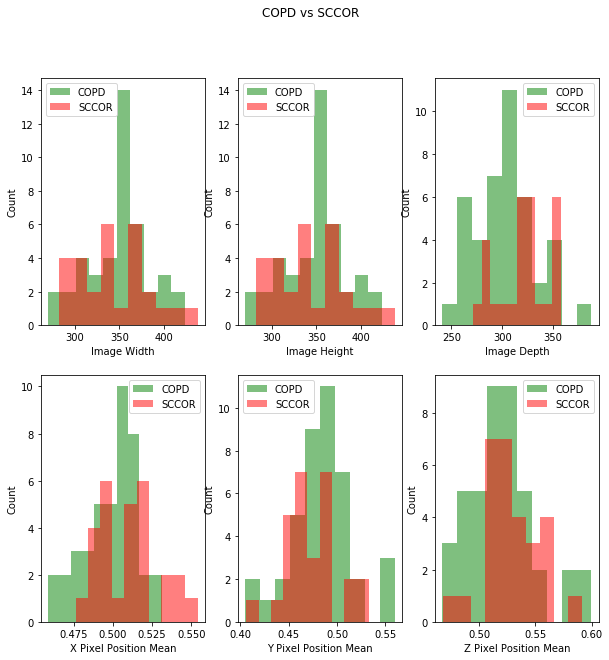

In [74]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3 ,figsize=(10,10))
ax1.hist(copd_width, label="COPD", alpha=0.5, color="green")
ax1.hist(sccor_width, label="SCCOR", alpha=0.5, color="red")
ax1.set(xlabel='Image Width', ylabel='Count')
ax1.legend()

ax2.hist(copd_height, label="COPD", alpha=0.5, color="green")
ax2.hist(sccor_height, label="SCCOR", alpha=0.5, color="red")
ax2.set(xlabel='Image Height', ylabel='Count')
ax2.legend()

ax3.hist(copd_depth, label="COPD", alpha=0.5, color="green")
ax3.hist(sccor_depth, label="SCCOR", alpha=0.5, color="red")
ax3.set(xlabel='Image Depth', ylabel='Count')
ax3.legend()

ax4.hist(copd_x_pixel, label="COPD", alpha=0.5, color="green")
ax4.hist(sccor_x_pixel, label="SCCOR", alpha=0.5, color="red")
ax4.set(xlabel='X Pixel Position Mean', ylabel='Count')
ax4.legend()

ax5.hist(copd_y_pixel, label="COPD", alpha=0.5, color="green")
ax5.hist(sccor_y_pixel, label="SCCOR", alpha=0.5, color="red")
ax5.set(xlabel='Y Pixel Position Mean', ylabel='Count')
ax5.legend()

ax6.hist(copd_z_pixel, label="COPD", alpha=0.5, color="green")
ax6.hist(sccor_z_pixel, label="SCCOR", alpha=0.5, color="red")
ax6.set(xlabel='Z Pixel Position Mean', ylabel='Count')
ax6.legend()

fig.suptitle("COPD vs SCCOR")


In [7]:
(unique_copd, counts_copd) = np.unique(copd_pixel_values, return_counts=True)
(unique_sccor, counts_sccor) = np.unique(sccor_pixel_values, return_counts=True)

### Histogram of Unique Pixel Values of both COPD & SCCOR

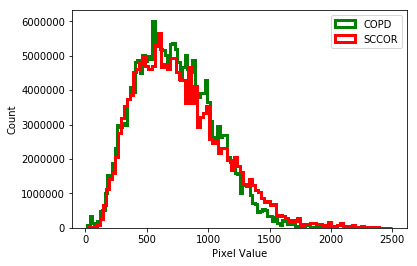

In [12]:
plt.hist(unique_copd[1:], weights=counts_copd[1:], bins=100, label="COPD", alpha=1, color="green", histtype="step", linewidth=3)
plt.hist(unique_sccor[1:], weights=counts_sccor[1:], bins=100, label="SCCOR", alpha=1, color="red", histtype="step", linewidth=3)
plt.xlabel("Pixel Value")
plt.ylabel("Count")
plt.legend()
#alpha=1, color="green", bins=50, range=(0,750), log=True, histtype="step", linewidth=3

In [6]:
COPDXRayTubeCurrent = []
SCCORXRayTubeCurrent = []
COPDExposure = []
SCCORExposure = []
COPDPatientAge = []
SCCORPatientAge = []
COPDKVP = []
SCCORKVP = []
COPDTableSpeed = []
SCCORTableSpeed = []
COPDConvolutionKernel = []
SCCORConvolutionKernel = []
COPDPatientPosition = []
SCCORPatientPosition = []
COPDSeriesNumber = []
SCCORSeriesNumber = []
for i in range(len(featureSource)):
    patInfo = featureSource[0][i]
    patInfo = patInfo.split("#")

    if len(patInfo) == 2: #COPD
        if patInfo[1] == 'Phase1':
            phase = 'Phase-1'
        elif patInfo[1] == 'Phase2':
            phase = 'Phase-2'
        dicom_path = '/pghbio/dbmi/batmanlab/Data/COPDGene/Images/'+patInfo[0]+'/'+phase+'/DICOM/'
        isoFile = featureSource[1][i].split("/")[-1]
        dicom_type = isoFile.replace("_BSpline_Iso1.0mm.nii.gz", "") 
        dicom_path = dicom_path + dicom_type
        dicom_files = os.listdir(dicom_path)
        dicom_file_path = os.path.join(dicom_path, dicom_files[1])
        ds = pydicom.filereader.dcmread(dicom_file_path)
        
        try:
            COPDXRayTubeCurrent.append(float(ds.XRayTubeCurrent))
        except:
            COPDXRayTubeCurrent.append(None)
            
        try:
            COPDExposure.append(float(ds.Exposure))
        except:
            COPDExposure.append(None)
            
        try:
            COPDPatientAge.append(float(ds.PatientAge.replace("Y","")))
        except:
            COPDPatientAge.append(None)
            
        try:
            COPDKVP.append(float(ds.KVP))
        except:
            COPDKVP.append(None)
        
        try:
            COPDTableSpeed.append(float(ds.TableSpeed))
        except:
            COPDTableSpeed.append(None)
            
        try:
            COPDConvolutionKernel.append(ds.ConvolutionKernel)
        except:
            COPDConvolutionKernel.append(None)
        
        try:
            COPDPatientPosition.append(ds.PatientPosition)
        except:
            COPDPatientPosition.append(None)
        
        try:
            COPDSeriesNumber.append(int(ds.SeriesNumber))
        except:
            COPDSeriesNumber.append(None)
        

    
    elif len(patInfo) == 3: #SCCOR
        dicom_path = '/pghbio/dbmi/batmanlab/Data/UPMC_Lung_Images/SCCOR/CT_Exams/'+patInfo[0]+'/'+patInfo[1]+'/'+patInfo[2]
        dicom_files = os.listdir(dicom_path)
        dicom_file_path = os.path.join(dicom_path, dicom_files[1])
        ds = pydicom.filereader.dcmread(dicom_file_path)
        
        try:
            SCCORXRayTubeCurrent.append(float(ds.XRayTubeCurrent))
        except:
            SCCORXRayTubeCurrent.append(None)
            
        try:
            SCCORExposure.append(float(ds.Exposure))
        except:
            SCCORExposure.append(None)
            
        try:
            SCCORPatientAge.append(float(ds.PatientAge.replace("Y","")))
        except:
            SCCORPatientAge.append(None)
            
        try:
            SCCORKVP.append(float(ds.KVP))
        except:
            SCCORKVP.append(None)
        
        try:
            SCCORTableSpeed.append(float(ds.TableSpeed))
        except:
            SCCORTableSpeed.append(None)
            
        try:
            SCCORConvolutionKernel.append(ds.ConvolutionKernel)
        except:
            SCCORConvolutionKernel.append(None)
        
        try:
            SCCORPatientPosition.append(ds.PatientPosition)
        except:
            SCCORPatientPosition.append(None)
        
        try:
            SCCORSeriesNumber.append(int(ds.SeriesNumber))
        except:
            SCCORSeriesNumber.append(None)
    
    

Text(0.5, 0.98, 'COPD vs SCCOR')

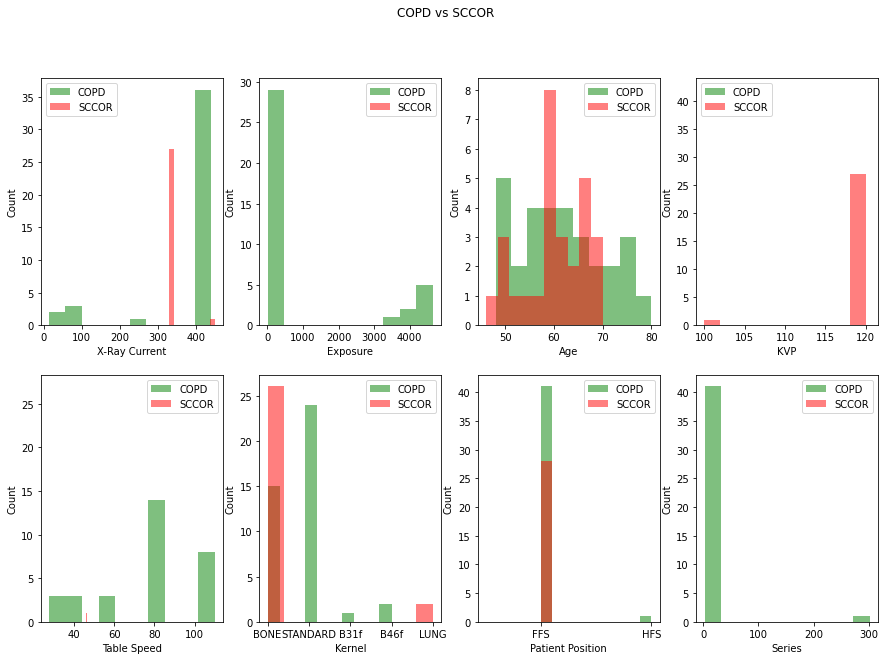

In [28]:

fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4 ,figsize=(15,10))
ax1.hist(list(filter(None, COPDXRayTubeCurrent)), label="COPD", alpha=0.5, color="green")
ax1.hist(list(filter(None, SCCORXRayTubeCurrent)), label="SCCOR", alpha=0.5, color="red")
ax1.set(xlabel='X-Ray Current', ylabel='Count')
ax1.legend()

ax2.hist(list(filter(None, COPDExposure)), label="COPD", alpha=0.5, color="green")
ax2.hist(list(filter(None, SCCORExposure)), label="SCCOR", alpha=0.5, color="red")
ax2.set(xlabel='Exposure', ylabel='Count')
ax2.legend()

ax3.hist(list(filter(None, COPDPatientAge)), label="COPD", alpha=0.5, color="green")
ax3.hist(list(filter(None, SCCORPatientAge)), label="SCCOR", alpha=0.5, color="red")
ax3.set(xlabel='Age', ylabel='Count')
ax3.legend()

ax4.hist(list(filter(None, COPDKVP)), label="COPD", alpha=0.5, color="green")
ax4.hist(list(filter(None, SCCORKVP)), label="SCCOR", alpha=0.5, color="red")
ax4.set(xlabel='KVP', ylabel='Count')
ax4.legend()

ax5.hist(list(filter(None, COPDTableSpeed)), label="COPD", alpha=0.5, color="green")
ax5.hist(list(filter(None, SCCORTableSpeed)), label="SCCOR", alpha=0.5, color="red")
ax5.set(xlabel='Table Speed', ylabel='Count')
ax5.legend()

ax6.hist(list(filter(None, COPDConvolutionKernel)), label="COPD", alpha=0.5, color="green")
ax6.hist(list(filter(None, SCCORConvolutionKernel)), label="SCCOR", alpha=0.5, color="red")
ax6.set(xlabel='Kernel', ylabel='Count')
ax6.legend()

ax7.hist(list(filter(None, COPDPatientPosition)), label="COPD", alpha=0.5, color="green")
ax7.hist(list(filter(None, SCCORPatientPosition)), label="SCCOR", alpha=0.5, color="red")
ax7.set(xlabel='Patient Position', ylabel='Count')
ax7.legend()

ax8.hist(list(filter(None, COPDSeriesNumber)), label="COPD", alpha=0.5, color="green")
ax8.hist(list(filter(None, SCCORSeriesNumber)), label="SCCOR", alpha=0.5, color="red")
ax8.set(xlabel='Series', ylabel='Count')
ax8.legend()

fig.suptitle("COPD vs SCCOR")

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Series SCCOR')]

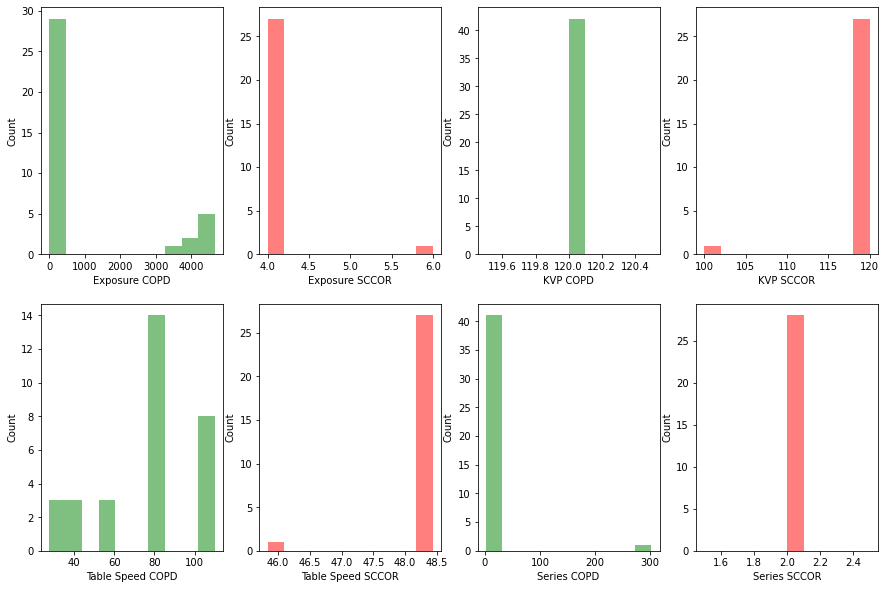

In [31]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4 ,figsize=(15,10))
ax1.hist(list(filter(None, COPDExposure)), label="COPD", alpha=0.5, color="green")
ax1.set(xlabel='Exposure COPD', ylabel='Count')
ax2.hist(list(filter(None, SCCORExposure)), label="SCCOR", alpha=0.5, color="red")
ax2.set(xlabel='Exposure SCCOR', ylabel='Count')

ax3.hist(list(filter(None, COPDKVP)), label="COPD", alpha=0.5, color="green")
ax3.set(xlabel='KVP COPD', ylabel='Count')
ax4.hist(list(filter(None, SCCORKVP)), label="SCCOR", alpha=0.5, color="red")
ax4.set(xlabel='KVP SCCOR', ylabel='Count')

ax5.hist(list(filter(None, COPDTableSpeed)), label="COPD", alpha=0.5, color="green")
ax5.set(xlabel='Table Speed COPD', ylabel='Count')
ax6.hist(list(filter(None, SCCORTableSpeed)), label="SCCOR", alpha=0.5, color="red")
ax6.set(xlabel='Table Speed SCCOR', ylabel='Count')

ax7.hist(list(filter(None, COPDSeriesNumber)), label="COPD", alpha=0.5, color="green")
ax7.set(xlabel='Series COPD', ylabel='Count')
ax8.hist(list(filter(None, SCCORSeriesNumber)), label="SCCOR", alpha=0.5, color="red")
ax8.set(xlabel='Series SCCOR', ylabel='Count')


In [32]:
np.unique(np.array(COPDSeriesNumber))

array([  2,   3,   4,   5,   6,   7,  10,  11,  12,  13, 302])

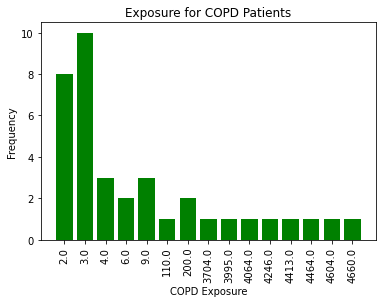

In [17]:
COPDExposureList = np.unique(np.array(list(filter(None, COPDExposure))) , return_counts=True)
x_pos = [i for i, _ in enumerate(COPDExposureList[0])]

plt.bar(x_pos, COPDExposureList[1], color='green')
plt.xlabel("COPD Exposure")
plt.ylabel("Frequency")
plt.title("Exposure for COPD Patients")

plt.xticks(x_pos, COPDExposureList[0], rotation=90)

plt.show()

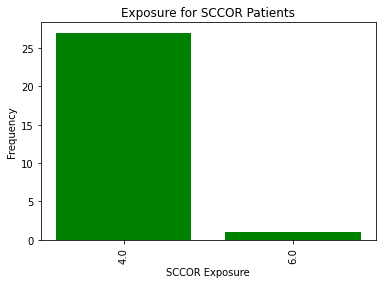

In [18]:
SCCORExposureList = np.unique(np.array(list(filter(None, SCCORExposure))) , return_counts=True)
x_pos = [i for i, _ in enumerate(SCCORExposureList[0])]

plt.bar(x_pos, SCCORExposureList[1], color='green')
plt.xlabel("SCCOR Exposure")
plt.ylabel("Frequency")
plt.title("Exposure for SCCOR Patients")

plt.xticks(x_pos, SCCORExposureList[0], rotation=90)

plt.show()

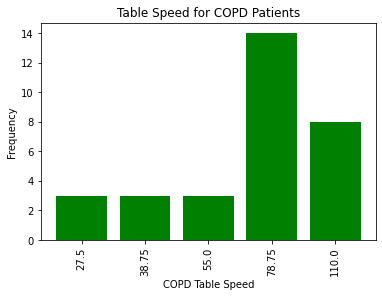

In [21]:
COPDTableSpeedList = np.unique(np.array(list(filter(None, COPDTableSpeed))) , return_counts=True)
x_pos = [i for i, _ in enumerate(COPDTableSpeedList[0])]

plt.bar(x_pos, COPDTableSpeedList[1], color='green')
plt.xlabel("COPD Table Speed")
plt.ylabel("Frequency")
plt.title("Table Speed for COPD Patients")

plt.xticks(x_pos, COPDTableSpeedList[0], rotation=90)

plt.show()

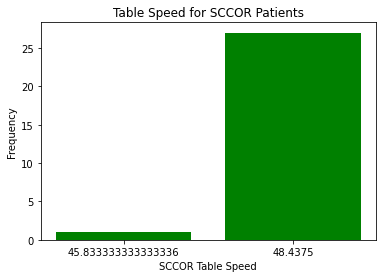

In [23]:
SCCORTableSpeedList = np.unique(np.array(list(filter(None, SCCORTableSpeed))) , return_counts=True)
x_pos = [i for i, _ in enumerate(SCCORTableSpeedList[0])]

plt.bar(x_pos, SCCORTableSpeedList[1], color='green')
plt.xlabel("SCCOR Table Speed")
plt.ylabel("Frequency")
plt.title("Table Speed for SCCOR Patients")

plt.xticks(x_pos, SCCORTableSpeedList[0])

plt.show()

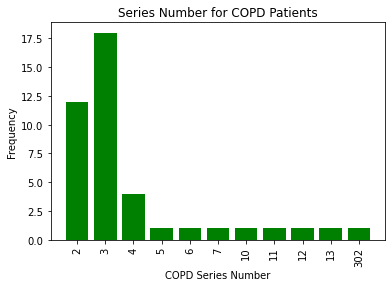

In [24]:
COPDSeriesNumberList = np.unique(np.array(list(filter(None, COPDSeriesNumber))) , return_counts=True)
x_pos = [i for i, _ in enumerate(COPDSeriesNumberList[0])]

plt.bar(x_pos, COPDSeriesNumberList[1], color='green')
plt.xlabel("COPD Series Number")
plt.ylabel("Frequency")
plt.title("Series Number for COPD Patients")

plt.xticks(x_pos, COPDSeriesNumberList[0], rotation=90)

plt.show()

In [25]:
i = 0
copd_meanF_0 = []
sccor_meanF_0 = []

copd_medianF_0 = []
sccor_medianF_0 = []

copd_stdF_0 = []
sccor_stdF_0 = []

copd_maxF_0 = []
sccor_maxF_0 = []

copd_minF_0 = []
sccor_minF_0 = []

copd_volume = []
sccor_volume = []

for patient in featureSource.values:
    print(patient[3])
    break
    
    fHOG_file = patient[3].replace('h5','csv.gz')
    fHOG_data = pd.read_csv(fHOG_file, compression='gzip', error_bad_lines=False)
    col_sum = fHOG_data.sum(axis = 0, skipna = True)
    
    meanF_0 = col_sum.loc['meanF_0']/len(fHOG_data)
    medianF_0 = col_sum.loc['medianF_0']/len(fHOG_data)
    stdF_0 = col_sum.loc['stdF_0']/len(fHOG_data)
    maxF_0 = col_sum.loc['maxF_0']/len(fHOG_data)
    minF_0 = col_sum.loc['minF_0']/len(fHOG_data)
    volume = col_sum.loc['volume']/len(fHOG_data)
    
    if i < 42:
        copd_meanF_0.append(meanF_0)
        copd_medianF_0.append(medianF_0)
        copd_stdF_0.append(stdF_0)
        copd_maxF_0.append(maxF_0)
        copd_minF_0.append(minF_0)
        copd_volume.append(volume)        
        
    else:
        sccor_meanF_0.append(meanF_0)
        sccor_medianF_0.append(medianF_0)
        sccor_stdF_0.append(stdF_0)
        sccor_maxF_0.append(maxF_0)
        sccor_minF_0.append(minF_0)
        sccor_volume.append(volume)         
        
    i += 1

/pghbio/dbmi/batmanlab/chirayu/Data/COPDGene/Test_Reproducing_Phase-1_Images/26002U/Phase-1/SuperVoxels/26002U_INSP_STD_HAR_COPD_Iso1.0mm_SuperVoxel_Param30mm_fHOG_Hist_Features.h5


Text(0.5, 0.98, 'COPD vs SCCOR')

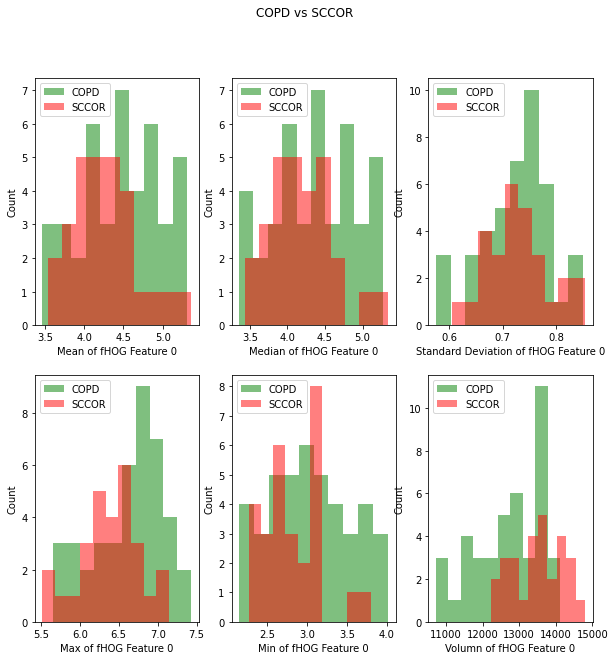

In [24]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3 ,figsize=(10,10))
ax1.hist(copd_meanF_0, label="COPD", alpha=0.5, color="green")
ax1.hist(sccor_meanF_0, label="SCCOR", alpha=0.5, color="red")
ax1.set(xlabel='Mean of fHOG Feature 0', ylabel='Count')
ax1.legend()

ax2.hist(copd_medianF_0, label="COPD", alpha=0.5, color="green")
ax2.hist(sccor_medianF_0, label="SCCOR", alpha=0.5, color="red")
ax2.set(xlabel='Median of fHOG Feature 0', ylabel='Count')
ax2.legend()

ax3.hist(copd_stdF_0, label="COPD", alpha=0.5, color="green")
ax3.hist(sccor_stdF_0, label="SCCOR", alpha=0.5, color="red")
ax3.set(xlabel='Standard Deviation of fHOG Feature 0', ylabel='Count')
ax3.legend()

ax4.hist(copd_maxF_0, label="COPD", alpha=0.5, color="green")
ax4.hist(sccor_maxF_0, label="SCCOR", alpha=0.5, color="red")
ax4.set(xlabel='Max of fHOG Feature 0', ylabel='Count')
ax4.legend()

ax5.hist(copd_minF_0, label="COPD", alpha=0.5, color="green")
ax5.hist(sccor_minF_0, label="SCCOR", alpha=0.5, color="red")
ax5.set(xlabel='Min of fHOG Feature 0', ylabel='Count')
ax5.legend()

ax6.hist(copd_volume, label="COPD", alpha=0.5, color="green")
ax6.hist(sccor_volume, label="SCCOR", alpha=0.5, color="red")
ax6.set(xlabel='Volumn of fHOG Feature 0', ylabel='Count')
ax6.legend()

fig.suptitle("COPD vs SCCOR")

## Sample COPD Patients

In [16]:
%%capture --no-display
img_path = '/pghbio/dbmi/batmanlab/chirayu/Data/COPDGene/Test_Reproducing_Phase-1_Images/26002U/Phase-1/Isotropic/26002U_INSP_SHARP_HAR_COPD_BSpline_Iso1.0mm.nii.gz'
patient_SCCOR = PyPatient(path=img_path, subject_id='1-0073-7')
# Display the patient object
patient_SCCOR.view(plane='coronal', three_planes=False, dynamic=True, image_size=400)

Row
    [0] WidgetBox
        [0] Select(margin=(20, 20, 5, 20), name='subject_id', options=['1-0073-7'], value='1-0073-7', width=250)
        [1] DiscreteSlider(formatter='%d', margin=(5, 20, 20, 20), name='y', options=OrderedDict([('0', ...]), value=0, width=250)
        [2] RangeSlider(end=2700.5487548828123, name='contrast', start=-4311.235522460937, value=(-3024.962646484375, ...)
    [1] HoloViews(GridSpace)

In [18]:
%%capture --no-display
img_path = '/pghbio/dbmi/batmanlab/chirayu/Data/COPDGene/Images/16903A/Phase-2/Isotropic/16903A_INSP_BONE_352_MSM_COPD2_BSpline_Iso1.0mm.nii.gz'
patient_SCCOR = PyPatient(path=img_path, subject_id='1-0073-7')
# Display the patient object
patient_SCCOR.view(plane='coronal', three_planes=False, dynamic=True, image_size=400)

Row
    [0] WidgetBox
        [0] Select(margin=(20, 20, 5, 20), name='subject_id', options=['1-0073-7'], value='1-0073-7', width=250)
        [1] DiscreteSlider(formatter='%d', margin=(5, 20, 20, 20), name='y', options=OrderedDict([('0', ...]), value=0, width=250)
        [2] RangeSlider(end=2948.05361328125, name='contrast', start=-3168.15126953125, value=(-2048.4833984375, ...)
    [1] HoloViews(GridSpace)

## Sample SCCOR Patients

In [17]:
%%capture --no-display
img_path = '/pylon5/ac5616p/debdas/SCCORProcessing/nifti/1-0810-4/Date_20110511/002/002_Iso1.0mm.nii.gz'
patient_SCCOR = PyPatient(path=img_path, subject_id='1-0073-7')
# Display the patient object
patient_SCCOR.view(plane='coronal', three_planes=False, dynamic=True, image_size=400)

Row
    [0] WidgetBox
        [0] Select(margin=(20, 20, 5, 20), name='subject_id', options=['1-0073-7'], value='1-0073-7', width=250)
        [1] DiscreteSlider(formatter='%d', margin=(5, 20, 20, 20), name='y', options=OrderedDict([('0', ...]), value=0, width=250)
        [2] RangeSlider(end=5307.1208984375, name='contrast', start=-5112.6736328125, value=(-3024.863525390625, ...)
    [1] HoloViews(GridSpace)

In [19]:
%%capture --no-display
img_path = '/pylon5/ac5616p/debdas/SCCORProcessing/nifti/1-0805-8/Date_20110316/002/002_Iso1.0mm.nii.gz'
patient_SCCOR = PyPatient(path=img_path, subject_id='1-0073-7')
# Display the patient object
patient_SCCOR.view(plane='coronal', three_planes=False, dynamic=True, image_size=400)

Row
    [0] WidgetBox
        [0] Select(margin=(20, 20, 5, 20), name='subject_id', options=['1-0073-7'], value='1-0073-7', width=250)
        [1] DiscreteSlider(formatter='%d', margin=(5, 20, 20, 20), name='y', options=OrderedDict([('0', ...]), value=0, width=250)
        [2] RangeSlider(end=4671.0232421875, name='contrast', start=-4411.14921875, value=(-3024.88427734375, ...)
    [1] HoloViews(GridSpace)

## COPD fHOG

In [17]:
feature_data_path = '/pghbio/dbmi/batmanlab/chirayu/Data/COPDGene/Test_Reproducing_Phase-1_Images/26002U/Phase-1/SuperVoxels/26002U_INSP_STD_HAR_COPD_Iso1.0mm_SuperVoxel_Param30mm_fHOG_Hist_Features.h5'
features_df = pd.HDFStore(feature_data_path,mode='r') #h5py.File(feature_data_path, 'r')
feature_keys = list(features_df.keys())
feature_keys

['/_26002U_INSP_STD_HAR_COPD']

In [18]:
features_df['/_26002U_INSP_STD_HAR_COPD']

meanF_0   meanF_1   meanF_2   meanF_3   meanF_4   meanF_5   meanF_6  \
151   5.899564  2.067626  1.972812  0.632545  1.006621  1.101693  1.426344   
165   5.335835  0.912750  1.699384  1.334227  1.130627  1.247638  2.553998   
166   5.622641  1.481324  0.584989  0.535202  0.769554  0.581535  1.929446   
172   4.796445  0.670215  1.742204  1.735433  1.434995  1.583258  2.769205   
173   4.690308  2.795556  1.773199  0.388529  0.887009  1.120316  1.337086   
...        ...       ...       ...       ...       ...       ...       ...   
1619  4.660578  0.744966  0.989571  0.749374  0.754655  0.908413  3.584880   
1620  6.658162  2.230337  2.632974  0.552744  0.936573  0.514742  7.100030   
1626  4.241680  0.193934  1.662868  0.347937  0.994347  0.621304  5.836811   
1631  6.905586  2.164310  2.005608  0.877071  0.778744  0.583340  6.247777   
1643  4.671241  0.157363  1.460922  0.287299  1.056169  0.673719  5.714240   

       meanF_7   meanF_8   meanF_9  ...  histF1018  histF1019  histF1020  \
151   1.762255  1.118365  3.062369  ...        0.0        0.0        0.0   
165   2.233966  2.058562  2.357327  ...        0.0        0.0        0.0   
166   1.437937  1.136146  1.510286  ...        0.0        0.0        0.0   
172   2.520313  1.959852  2.568941  ...        0.0        0.0        0.0   
173   1.074260  1.122929  1.390745  ...        0.0        0.0        0.0   
...        ...       ...       ...  ...        ...        ...        ...   
1619  0.971570  1.081169  1.181575  ...        0.0        0.0        0.0   
1620  0.116246  1.946408  3.240364  ...        0.0        0.0        0.0   
1626  0.137922  2.244656  3.240939  ...        0.0        0.0        0.0   
1631  0.342774  2.731798  3.739012  ...        0.0        0.0        0.0   
1643  0.101243  3.168937  2.843325  ...        0.0        0.0        0.0   

      histF1021  histF1022  histF1023  histF1024  volume  belowMinus1024  \
151         0.0        0.0        0.0        0.0   216.0             0.0   
165         0.0        0.0        0.0        0.0  3978.0             0.0   
166         0.0        0.0        0.0        0.0    70.0             0.0   
172         0.0        0.0        0.0        0.0  4496.0             0.0   
173         0.0        0.0        0.0        0.0   189.0             0.0   
...         ...        ...        ...        ...     ...             ...   
1619        0.0        0.0        0.0        0.0  8207.0             0.0   
1620        0.0        0.0        0.0        0.0    14.0             0.0   
1626        0.0        0.0        0.0        0.0    22.0             0.0   
1631        0.0        0.0        0.0        0.0   766.0             0.0   
1643        0.0        0.0        0.0        0.0    14.0             0.0   

      above1024  
151         0.0  
165         0.0  
166         0.0  
172         0.0  
173         0.0  
...         ...  
1619        0.0  
1620        0.0  
1626        0.0  
1631        0.0  
1643        0.0  

[483 rows x 2192 columns]

In [19]:
sum(features_df['/_26002U_INSP_STD_HAR_COPD']['meanF_0'])/483

4.047638537967674

## SCCOR fHOG

In [20]:
feature_data_path = '/pylon5/ac5616p/debdas/SCCORProcessing/nifti/1-0839-1/Date_20120111/002/002_Iso1.0mm_SuperVoxel_Param30mm_fHOG_Hist_Features.h5'
features_df = pd.HDFStore(feature_data_path,mode='r') #h5py.File(feature_data_path, 'r')
feature_keys = list(features_df.keys())
feature_keys

['/_002_Iso1.0mm.nii.gz']

In [21]:
features_df['/_002_Iso1.0mm.nii.gz']

meanF_0   meanF_1   meanF_2   meanF_3   meanF_4   meanF_5   meanF_6  \
21    9.044102  0.945585  0.414382  0.612727  0.810385  0.580888  1.659457   
27    5.739875  0.219841  1.049192  0.340907  1.828617  0.750699  5.912762   
43    9.355277  0.132467  0.392014  0.151986  0.181494  0.255482  1.232026   
121   7.266999  0.430166  0.668934  0.096423  1.163499  0.390567  6.512048   
128   6.179465  0.192886  0.651153  0.449561  1.388406  0.858779  5.701728   
...        ...       ...       ...       ...       ...       ...       ...   
1135  6.826235  1.488122  2.051796  0.489115  1.853607  0.628140  8.042365   
1148  5.605185  0.206135  1.021282  0.945420  0.620675  1.220340  5.719609   
1197  7.852034  1.150338  2.416027  0.476504  1.269118  0.446417  7.367522   
1201  7.443196  1.112842  2.330492  0.579967  1.412056  0.485485  7.131894   
1217  7.309238  1.269081  2.729454  0.530541  1.472993  0.467084  7.448562   

       meanF_7   meanF_8   meanF_9  ...  histF1018  histF1019  histF1020  \
21    1.250607  1.431871  1.618073  ...        0.0        0.0        0.0   
27    0.322137  2.942183  2.940972  ...        0.0        0.0        0.0   
43    1.198280  0.624359  0.983489  ...        0.0        0.0        0.0   
121   0.081144  2.143966  2.728843  ...        0.0        0.0        0.0   
128   0.254143  2.264714  2.386353  ...        0.0        0.0        0.0   
...        ...       ...       ...  ...        ...        ...        ...   
1135  0.133612  3.880011  5.078383  ...        0.0        0.0        0.0   
1148  0.465796  2.114286  2.332808  ...        0.0        0.0        0.0   
1197  0.229255  3.844154  4.994736  ...        0.0        0.0        0.0   
1201  0.361797  3.974066  4.761455  ...        0.0        0.0        0.0   
1217  0.319396  3.948213  4.755617  ...        0.0        0.0        0.0   

      histF1021  histF1022  histF1023  histF1024  volume  belowMinus1024  \
21          0.0        0.0        0.0        0.0     2.0             0.0   
27          0.0        0.0        0.0        0.0   858.0             0.0   
43          0.0        0.0        0.0        0.0   228.0             8.0   
121         0.0        0.0        0.0        0.0   107.0             0.0   
128         0.0        0.0        0.0        0.0  1329.0             1.0   
...         ...        ...        ...        ...     ...             ...   
1135        0.0        0.0        0.0        0.0   157.0             1.0   
1148        0.0        0.0        0.0        0.0    69.0             0.0   
1197        0.0        0.0        0.0        0.0   775.0             4.0   
1201        0.0        0.0        0.0        0.0   855.0            11.0   
1217        0.0        0.0        0.0        0.0  1034.0             3.0   

      above1024  
21          0.0  
27          0.0  
43          0.0  
121         0.0  
128         0.0  
...         ...  
1135        0.0  
1148        0.0  
1197        0.0  
1201        0.0  
1217        0.0  

[395 rows x 2192 columns]

In [16]:
sum(features_df['/_002_Iso1.0mm.nii.gz']['meanF_0'])/395

4.373379241062116

In [25]:
sum(features_df['/_002_Iso1.0mm.nii.gz'].values)

array([1.72748480e+03, 3.75555455e+02, 6.96461153e+02, ...,
       5.31347200e+06, 4.85340000e+04, 6.30000000e+01])

In [4]:
#series1_path = '/pghbio/dbmi/batmanlab/chirayu/Data/COPDGene/Images/16903A/Phase-2/DICOM/16903A_INSP_STD_352_MSM_COPD2/'
series1_path = '/pghbio/dbmi/batmanlab/chirayu/Data/COPDGene/Images/16903A/Phase-2/DICOM/16903A_INSP_STD_352_MSM_COPD2/'
series1_files = os.listdir(series1_path)
dicom_file_path = series1_path + series1_files[0]
print(dicom_file_path)
ds = pydicom.filereader.dcmread(dicom_file_path)
ds

/pghbio/dbmi/batmanlab/chirayu/Data/COPDGene/Images/16903A/Phase-2/DICOM/16903A_INSP_STD_352_MSM_COPD2/1.2.840.113619.2.55.1.1762927041.1995.1399374210.860.170.dcm


Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 196
(0002, 0001) File Meta Information Version       OB: b'\x01\x00'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113619.2.55.1.1762927041.1995.1399374210.860.170
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 2.16.840.1.114151.100.1.1
(0002, 0013) Implementation Version Name         SH: 'MergeCOM3_390'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '20140101'
(0008, 0013) Instance Creation Time              TM: '151348'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instan